In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization,LeakyReLU,Flatten
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline 
# To enable plotting graphs in Jupyter notebook
import seaborn as sns
# Import necessary modules.

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow

In [4]:
from google.colab import drive

In [6]:
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [64]:
project_path = '/content/drive/My Drive/Colab Notebooks/Project7/'

In [65]:
labelsPath = project_path + 'Labels.csv'

In [66]:
labels = pd.read_csv(labelsPath)

In [67]:
imagesPath = project_path + 'images.npy'

In [68]:
images = np.load(imagesPath, mmap_mode='r')

In [69]:
labels.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [70]:
labels.shape

(4750, 1)

In [71]:
images.shape

(4750, 128, 128, 3)

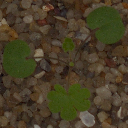

In [72]:
i=1
img = images[i]
img = np.array(img, dtype=np.uint8)  
cv2_imshow(img)

In [73]:
#Normalization of data

In [74]:
data = np.array(images, dtype="float") / 255.0
labels = np.array(labels)

In [75]:
normImages = [];
for image in images:
  normalizedImg = np.zeros((128, 128))
  normImages.append(cv2.normalize(image,  normalizedImg, 0, 255, cv2.NORM_MINMAX))


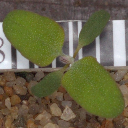

In [76]:
cv2_imshow(normImages[500])

In [77]:
normImages[0].shape

(128, 128, 3)

In [78]:
#Gaussian Blurring

In [79]:
gauss_blur_images = [];
for image in normImages:
  gauss_blur_images.append(cv2.GaussianBlur(image, (5, 5),0))

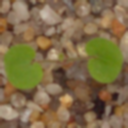

In [80]:
cv2_imshow(gauss_blur_images[0])

In [81]:
#Get unique values from labels

In [82]:
unique_labels = np.unique(labels)

In [83]:
print(unique_labels)

['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']


In [84]:

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
labels = enc.fit_transform(labels)

In [85]:
label_dict =  {0:'Black-grass', 1:'Charlock', 2:'Cleavers', 3:'Common Chickweed', 4:'Common wheat', 5:'Fat Hen', 6:'Loose Silky-bent', 
               7:'Maize', 8:'Scentless Mayweed', 9:'Shepherds Purse',10: 'Small-flowered Cranesbill', 11: 'Sugar beet'}

In [86]:
print(labels[0])

[0 0 0 0 0 0 0 0 0 0 1 0]


In [87]:
train_x, test_x, train_y, test_y = train_test_split(gauss_blur_images, labels, test_size=0.3)

In [88]:
len(test_x)

1425

In [89]:
val_x,test_x,val_y,test_y = train_test_split(test_x, test_y, test_size=0.5)

In [90]:
len(test_x)

713

In [91]:
test_x[0].shape

(128, 128, 3)

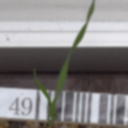

In [92]:
cv2_imshow(val_x[0])

In [93]:
#As from above we can see the shape is not correct. We need to use reshape and reconfigure all three train , val and test dataset 

In [94]:
X_train = np.array([img for img in train_x])
X_val = np.array([img for img in val_x])
X_test = np.array([img for img in test_x])

In [95]:
X_train.shape

(3325, 128, 128, 3)

In [96]:
X_val.shape

(712, 128, 128, 3)

In [97]:
X_test.shape

(713, 128, 128, 3)

In [120]:
# Set the CNN model

batch_size = None
model = None
model = models.Sequential()
model.add(layers.Conv2D(256, (3, 3), padding='valid', activation="relu", input_shape=X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(128, (3, 3), padding='valid', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), padding='valid', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(32, (3, 3), padding='valid', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(16, (3, 3), padding='valid', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(layers.Dropout(0.2))

model.add(Flatten())
model.add(layers.Dense(500))
model.add(layers.Activation("relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 126, 126, 256)     7168      
_________________________________________________________________
batch_normalization_15 (Batc (None, 126, 126, 256)     1024      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 63, 63, 256)       0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 63, 63, 256)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 61, 61, 128)       295040    
_________________________________________________________________
batch_normalization_16 (Batc (None, 61, 61, 128)       512       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 30, 30, 128)      

In [121]:

# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [122]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [102]:
X_train = X_train.astype('float32') # Conversion to float type from integer type.
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255.0 # Division by 255
X_test /= 255.0
X_val /= 255.0

In [103]:
X_train[0]

array([[[0.36078432, 0.34901962, 0.3529412 ],
        [0.3529412 , 0.34117648, 0.34901962],
        [0.3372549 , 0.3254902 , 0.32941177],
        ...,
        [0.2       , 0.20784314, 0.23137255],
        [0.2       , 0.20784314, 0.22745098],
        [0.2       , 0.20392157, 0.22745098]],

       [[0.34117648, 0.33333334, 0.34117648],
        [0.3372549 , 0.3254902 , 0.3372549 ],
        [0.3254902 , 0.31764707, 0.3254902 ],
        ...,
        [0.19607843, 0.20784314, 0.22745098],
        [0.19607843, 0.20392157, 0.22745098],
        [0.2       , 0.20392157, 0.22352941]],

       [[0.32941177, 0.32156864, 0.3372549 ],
        [0.3254902 , 0.32156864, 0.3372549 ],
        [0.3254902 , 0.32156864, 0.3372549 ],
        ...,
        [0.19215687, 0.2       , 0.22352941],
        [0.19607843, 0.2       , 0.22352941],
        [0.19607843, 0.2       , 0.22352941]],

       ...,

       [[0.25882354, 0.35686275, 0.44705883],
        [0.25490198, 0.3529412 , 0.44313726],
        [0.23921569, 0

In [123]:
#Lets Try to incorporate early stopping in to the model 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=20)

In [124]:
#Save the best weight 
model_checkpoint =  ModelCheckpoint('cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

Epoch 1/80
67/67 [==============================] - 12s 169ms/step - loss: 2.5308 - accuracy: 0.1871 - val_loss: 2.5394 - val_accuracy: 0.1910

Epoch 00001: val_loss improved from inf to 2.53939, saving model to cnn_checkpoint_01_loss2.5394.h5
Epoch 2/80
67/67 [==============================] - 11s 170ms/step - loss: 1.6899 - accuracy: 0.4236 - val_loss: 3.7516 - val_accuracy: 0.1433

Epoch 00002: val_loss did not improve from 2.53939
Epoch 3/80
67/67 [==============================] - 11s 169ms/step - loss: 1.3790 - accuracy: 0.5207 - val_loss: 5.0094 - val_accuracy: 0.1531

Epoch 00003: val_loss did not improve from 2.53939
Epoch 4/80
67/67 [==============================] - 11s 168ms/step - loss: 1.2009 - accuracy: 0.5870 - val_loss: 4.3738 - val_accuracy: 0.1503

Epoch 00004: val_loss did not improve from 2.53939
Epoch 5/80
67/67 [==============================] - 11s 166ms/step - loss: 1.0539 - accuracy: 0.6486 - val_loss: 4.0628 - val_accuracy: 0.2008

Epoch 00005: val_loss did n

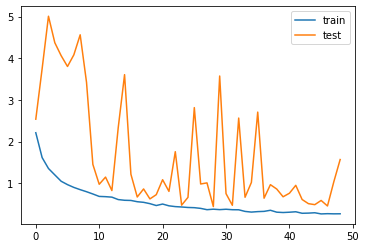

In [125]:
#Fit the model 
history = model.fit(X_train,
                    train_y,
                    batch_size=50,
                    epochs=80,
                    validation_data=(X_val, val_y),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [126]:
# Score trained model.
scores = model.evaluate(X_val, val_y, verbose=1)
print('Val loss:', scores[0])
print(' accuracy:', scores[1])

23/23 [==============================] - 1s 26ms/step - loss: 1.5707 - accuracy: 0.6643
Val loss: 1.5707476139068604
 accuracy: 0.6643258333206177


In [127]:
scores = model.evaluate(X_test, test_y, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 1s 26ms/step - loss: 1.3293 - accuracy: 0.7041
Test loss: 1.3292802572250366
Test accuracy: 0.7040673494338989


In [128]:
Y_pred = model.predict_generator(X_test, len(X_test)//(50+1))
y_pred = np.argmax(Y_pred, axis=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [129]:
print('Confusion Matrix')
print(confusion_matrix(tf.argmax(test_y, axis = 1), y_pred))
print('Classification Report')
print(classification_report(tf.argmax(test_y, axis = 1), y_pred, target_names=unique_labels))


Confusion Matrix
[[  3   0   0   0   0   0  36   0   0   0   0   0]
 [  0  35   7   0   0   1   0   3   2   4   1   1]
 [  0   0  41   0   4   0   0   0   3   0   0   0]
 [  0   0   0  69   2   2  15   1   2   3   1   0]
 [  2   0   0   0  25   0   6   1   0   0   0   0]
 [  0   0   0   0   1  60   8   0   0   0   0   0]
 [  2   0   0   0   0   0 108   0   0   0   0   0]
 [  0   0   0   0   1   5   2  19   0   0   0   0]
 [  0   0   0   1   4   0  11   1  43  14   0   0]
 [  0   1   0   4   0   1   4   0   5  26   0   0]
 [  0   0   0   0   0   3   5   1   0   0  66   0]
 [  1   0   0   0   6   5  22   0   5   0   1   7]]
Classification Report
                           precision    recall  f1-score   support

              Black-grass       0.38      0.08      0.13        39
                 Charlock       0.97      0.65      0.78        54
                 Cleavers       0.85      0.85      0.85        48
         Common Chickweed       0.93      0.73      0.82        95
            

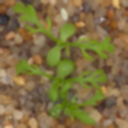

actual value: [0 0 0 0 0 0 0 0 1 0 0 0]
predicted value: 8


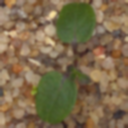

actual value: [0 0 1 0 0 0 0 0 0 0 0 0]
predicted value: 2


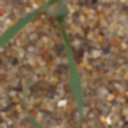

actual value: [0 0 0 0 1 0 0 0 0 0 0 0]
predicted value: 4


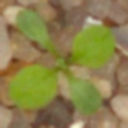

actual value: [0 0 0 0 0 0 0 0 0 1 0 0]
predicted value: 9


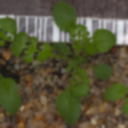

actual value: [0 0 0 0 0 0 0 0 0 1 0 0]
predicted value: 9


In [130]:
test_images = [2,3,33,36,59]
for test_image in test_images:
  cv2_imshow(test_x[test_image])
  print("actual value:", test_y[test_image])
  print("predicted value:", y_pred[test_image])